# Basic Digit Hand Writing Recognition with KMeans Clustering

#### Imports

In [77]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Introductions to Dataset 

In [78]:
# load dataset
digits = datasets.load_digits()

# Inspect Dataset Description
# print(digits.DESCR)

# Check Digit Data
digits_data = digits.data

# Check Digit Targets
digit_targets = digits.target
k = len(np.unique(digits.target))

# 5. Check Digit Images
digit_images = digits.images

#### Use matplotlib to view image => compare with target

2


<Figure size 432x288 with 0 Axes>

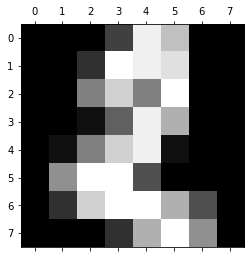

In [89]:

img = 2
plt.gray()
plt.matshow(digit_images[img])
print(digit_targets[img])
plt.show()

In [80]:
# Build model
kmeans = KMeans(init="k-means++", n_clusters = k)
kmeans.fit(digits_data)

KMeans(n_clusters=10)

#### Visualise Centroids

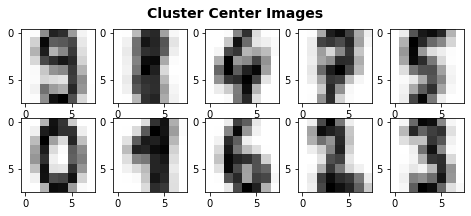

In [81]:
fig = plt.figure(figsize=(8,3))
fig.suptitle("Cluster Center Images", fontsize=14, fontweight="bold")
for i in range(k):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape(8,8), cmap=plt.cm.binary)
plt.show()

#### Test model on test data

In [94]:
# test predictor

range_start = 0
range_end = 10

x_test = digits_data[range_start:range_end]
y_pred = kmeans.predict(x_test)

# match indexes of Test values with images manually
print(f"Test values: {y_pred}")
print(f"True Values: {digit_targets[range_start:range_end]} => find the images above that correspond to these indices")


True values: [5 1 1 9 2 0 7 3 0 0]
Test Values: [0 1 2 3 4 5 6 7 8 9] => find the images above that correspond to these indices


#### Test model on my own handwriting

In [100]:
my_handwriting = np.array([
[0.00,0.23,4.12,5.34,5.34,4.27,0.76,0.00,0.00,4.42,7.62,5.72,5.64,7.47,7.17,1.29,0.53,7.24,5.19,0.00,0.00,1.76,7.63,3.81,1.52,7.62,2.44,0.00,0.00,0.00,7.62,3.81,0.84,7.63,3.89,0.00,0.00,0.00,7.62,3.81,0.00,5.64,7.02,1.22,0.00,0.46,7.62,3.81,0.00,2.14,7.32,7.55,6.18,6.79,7.62,2.06,0.00,0.00,0.92,4.04,4.57,4.57,2.59,0.00],
[0.00,0.00,0.69,0.76,0.23,0.00,0.00,0.00,3.28,6.63,7.62,7.62,6.79,0.92,0.00,0.00,4.58,5.64,3.13,2.67,7.32,4.57,0.00,0.00,0.00,0.00,0.00,0.00,5.42,6.48,0.00,0.00,0.00,0.00,0.00,0.00,4.57,6.86,0.00,0.00,0.00,3.43,6.10,5.87,6.25,6.86,0.00,0.00,0.00,5.87,7.62,7.62,7.62,7.09,2.36,0.23,0.00,1.37,3.81,3.81,4.42,7.63,7.62,1.90],
[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.07,6.33,7.62,7.62,7.62,7.24,3.51,0.00,4.80,7.32,3.58,3.05,3.20,7.32,5.11,0.08,7.40,4.73,0.00,0.00,0.00,6.10,5.34,0.76,7.62,3.13,0.00,0.00,0.69,7.09,4.80,0.23,7.17,6.48,1.83,0.76,5.49,7.47,1.60,0.00,2.14,7.01,7.62,7.62,7.62,3.74,0.00,0.00,0.00,0.31,2.21,2.29,2.14,0.08,0.00],
[1.45,6.41,7.62,7.62,7.62,7.62,7.17,4.88,4.50,7.62,3.28,1.52,1.52,2.67,3.81,2.44,2.98,7.62,4.88,0.76,0.00,0.00,0.00,0.00,0.00,4.35,7.40,7.17,4.50,2.06,0.00,0.00,0.00,0.00,1.45,5.34,7.24,7.62,3.05,0.00,0.00,0.00,0.00,0.00,1.53,7.24,5.34,0.00,2.98,3.81,4.42,6.71,7.62,7.55,3.51,0.00,5.88,6.86,6.86,5.57,3.35,1.07,0.00,0.00]
])

y_pred = kmeans.predict(my_handwriting)

print(f"Test values: {y_pred}) => find the images above that correspond to these indices")
print(f"True Values: 0705") 

Test values: [5 8 5 4]) => find the images above that correspond to these indices
True Values: 1234


Works!!! ...Sometimes... Overall, not bad.